**Classwork 3**


**Code to Implement a LeNet model on the basis of the digit MNIST dataset.**

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [49]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

#normalizing the dataset
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

#In the Question it's asked to take training data as 75% and testing as 25%
#Combine both the training and test data
x = np.concatenate((x_train, x_test), axis=0)   
y = np.concatenate((y_train, y_test), axis=0)
print("-----------------------------------------------------------")
print(x.shape)
print(y.shape)
print("-----------------------------------------------------------")
#Now we will split the data into 75% training and 25% testing
import sklearn
from sklearn.model_selection import train_test_split
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(x, y, test_size = 0.25, random_state = 42)
print(x_train_new.shape)
print(x_test_new.shape)
print(y_train_new.shape)


(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)
-----------------------------------------------------------
(70000, 28, 28)
(70000,)
-----------------------------------------------------------
(52500, 28, 28)
(17500, 28, 28)
(52500,)


In [50]:

#reshaping the dataset
#x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
#x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))
#x_train = np.expand_dims(x_train, axis=-1)
#x_test = np.expand_dims(x_test, axis=-1)


In [51]:
#Building the LeNet model
from keras import layers
model = keras.Sequential([
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu', padding="valid", data_format="channels_last", input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2,2), padding="valid", strides=(2), data_format="channels_last"),
    layers.Conv2D(filters=64, kernel_size=(5,5), activation='relu', padding="valid", data_format="channels_last"),
    layers.MaxPooling2D(pool_size=(2,2), padding="valid",strides=(2), data_format="channels_last"),
    layers.Flatten(),
    layers.Dense(1024, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 12, 12, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 4, 4, 64)          0         
 ng2D)                                                           
                                                                 
 flatten_6 (Flatten)         (None, 1024)              0         
                                                                 
 dense_12 (Dense)            (None, 1024)             

In [54]:
#define the loss function and optimizer
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
#train the model
history = model.fit(x_train_new, y_train_new, epochs=15, batch_size=32,validation_data=(x_test_new,y_test_new), verbose=1)


Epoch 1/15
1641/1641 [==============================] - 32s 19ms/step - loss: 0.0421 - accuracy: 0.9872 - val_loss: 0.0458 - val_accuracy: 0.9857
Epoch 2/15
1641/1641 [==============================] - 33s 20ms/step - loss: 0.0266 - accuracy: 0.9914 - val_loss: 0.0416 - val_accuracy: 0.9872
Epoch 3/15
1641/1641 [==============================] - 33s 20ms/step - loss: 0.0197 - accuracy: 0.9938 - val_loss: 0.0330 - val_accuracy: 0.9910
Epoch 4/15
1641/1641 [==============================] - 30s 19ms/step - loss: 0.0146 - accuracy: 0.9954 - val_loss: 0.0443 - val_accuracy: 0.9890
Epoch 5/15
1641/1641 [==============================] - 28s 17ms/step - loss: 0.0136 - accuracy: 0.9959 - val_loss: 0.0425 - val_accuracy: 0.9902
Epoch 6/15
1641/1641 [==============================] - 27s 17ms/step - loss: 0.0110 - accuracy: 0.9961 - val_loss: 0.0486 - val_accuracy: 0.9883
Epoch 7/15
1641/1641 [==============================] - 28s 17ms/step - loss: 0.0108 - accuracy: 0.9968 - val_loss: 0.0438 -

Test accuracy: 0.9915


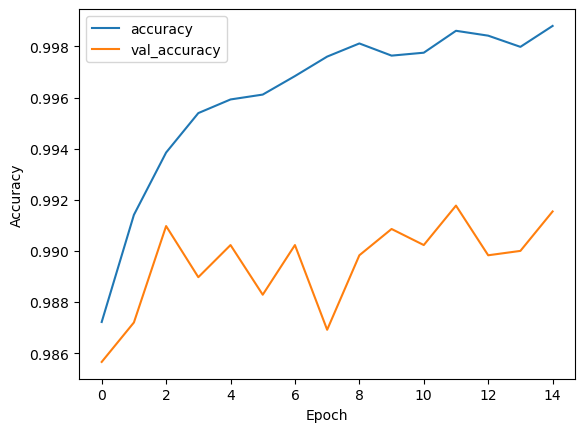

In [56]:
#evaluate the model
test_loss, test_accuracy = model.evaluate(x_test_new, y_test_new, verbose=0)
print(f"Test accuracy: {test_accuracy:.4f}")
#plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


547/547 [==============================] - 3s 5ms/step


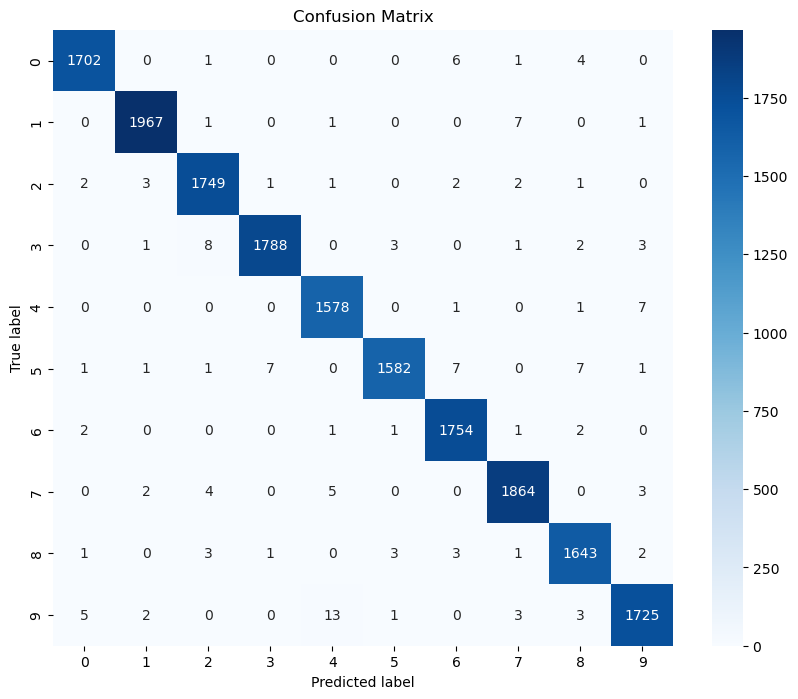

In [55]:
#plot the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
conf = confusion_matrix(y_test_new, model.predict(x_test_new).argmax(axis=1))
plt.figure(figsize=(10, 8))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues')    
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()


# Accuracy Metrics
---
**The accuracy after training the model on 75% of training and testing it on 25% of the data we got the below accuracies:**

***Train accuracy: 0.9988***
<br><br/>
***Test accuracy: 0.9915***
<br><br/>